# The Sharpe Ratio

It was introduced by Professor William Sharpe as [reward to variability ratio in 1966](https://web.stanford.edu/~wfsharpe/art/sr/SR.htm), in general known as [Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp). 
The Sharpe ratio has become one of the most popular method for calculating risk-adjusted returns. 
It looks at the difference in returns for two different investment opportunities and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. The ideal situation is, of course, that the returns are considerable but that the additional risk of investing is as small as possible. That’s why, the greater the portfolio’s Sharpe ratio, the better: the ratio between the returns and the additional risk that is incurred is quite OK. Usually, a ratio greater than 1 is acceptable by investors, 2 is very good and 3 is excellent.
It is common to compare a specific opportunity against a benchmark that represents an entire category of investments. We'll calculate the Sharpe ratio for the stocks of some of the giant financial institutes. As a benchmark, we'll use the S&P 500 that measures the performance of the 500 largest stocks in the US.

### Get the Data

We will get stock information for the following banks from yahoo finance for the year 2017:
- Bank of America
- CitiGroup
- JPMorgan Chase
- HSBC

Store 'Adj Close' price for each stock in 'stocks' dataframe.

In [2]:
from pandas_datareader import DataReader
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
start = date(2017, 1, 1)
end = date(2017, 12, 31)
# Bank of America
BAC = DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = DataReader("C", 'yahoo', start, end)
# Goldman Sachs
GS = DataReader("GS", 'yahoo', start, end)
# JPMorgan Chase
JPM = DataReader("JPM", 'yahoo', start, end)
# Morgan Stanley
MS = DataReader("MS", 'yahoo', start, end)
# Wells Fargo
WFC = DataReader("WFC", 'yahoo', start, end)
# HSBC
HSBC = DataReader("HSBC", 'yahoo', start, end)

In [3]:
# Store 'Adj Close' price for each stock in 'stocks' dataframe.
stocks = pd.DataFrame({'BAC': BAC['Adj Close'],
                       'C': C['Adj Close'],
                       #'GS': GS['Adj Close'],
                       'JPM': JPM['Adj Close'],
                       #'MS': MS['Adj Close'],
                       #'WFC': WFC['Adj Close'],
                       'HSBC': HSBC['Adj Close']
                      })
stocks.head()

,BAC,C,HSBC,JPM
Date,,,,
2017-01-03,22.179554,59.721642,38.630592,85.284027
2017-01-04,22.593021,60.529888,38.999046,85.441330
2017-01-05,22.327221,59.475216,38.885674,84.654839
2017-01-06,22.327221,59.682209,38.876228,84.664673
2017-01-09,22.199242,59.356945,38.413300,84.723648


In [4]:
# Store S&P 500 as benchmark
benchmark = DataReader("^GSPC",'yahoo',start, end)
benchmark = benchmark['Adj Close']
benchmark.describe()

count     251.000000
mean     2449.076379
std       109.417247
min      2257.830078
25%      2365.584961
50%      2436.100098
75%      2524.240112
max      2690.159912
Name: Adj Close, dtype: float64

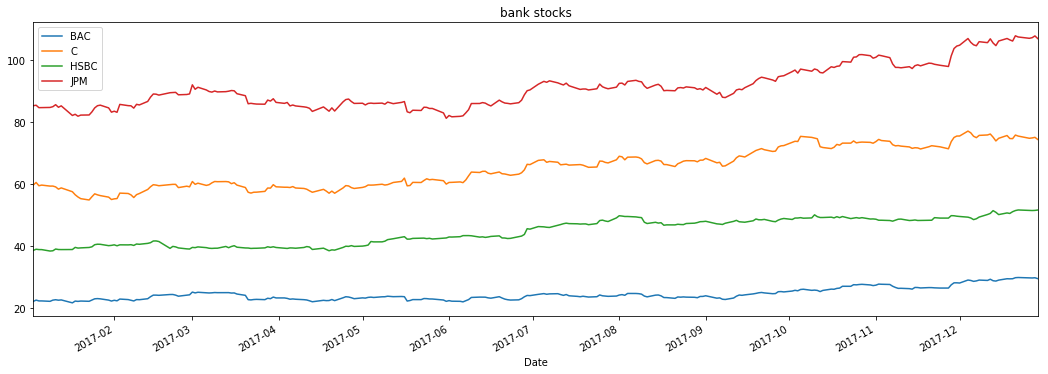

In [5]:
#plot stocks data
stocks.plot(title='bank stocks', figsize=(18,6))

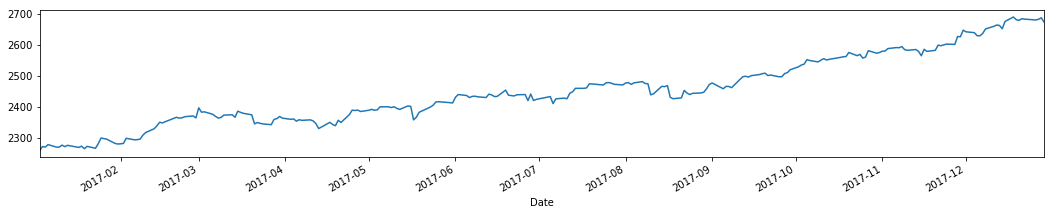

In [6]:
#plot benchmark data
benchmark.plot(figsize=(18,3))

### Daily Stock Returns and Sharpe Ratio Calculation

1. Calculate the daily stock returns for the two investment opportunities i.e. stocks and S&P500 and name as "stock_returns" and "benchmark_returns". 
2. Calculate the relative performance of stocks vs. the S&P 500 benchmark by taking the difference in returns between stock_returns and benchmark_returns for each day. Name it as "excess_returns".
3. Calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark. Name it as "avg_excess_returns".
4. Calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500. Name it as "std_excess_returns".
5. Compute the ratio of avg_excess_returns and std_excess_returns. The result is now finally the Sharpe ratio and indicates how much more or less return the investment opportunity under consideration yields per unit of risk.
6. Note that Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days.

,BAC,C,HSBC,JPM
count,250.000000,250.000000,250.000000,250.000000
mean,0.001235,0.000941,0.001202,0.000958
std,0.013513,0.011037,0.009037,0.010231
min,-0.059191,-0.040166,-0.053063,-0.038124
25%,-0.005836,-0.005005,-0.003079,-0.004184
50%,-0.000411,0.000066,0.000475,0.000117
75%,0.009378,0.006681,0.005758,0.006687
max,0.040511,0.032357,0.042105,0.035258


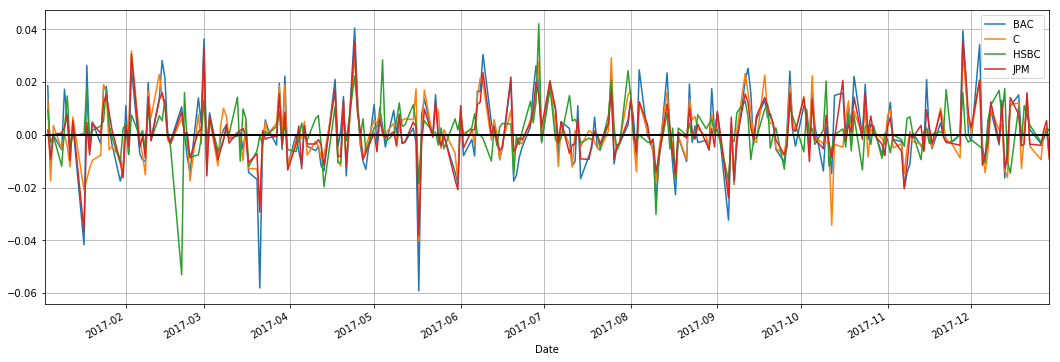

In [7]:
# calculate daily stock returns for the banks
stock_returns = stocks.pct_change()
stock_returns.plot(figsize=(18,6), grid=True).axhline(y = 0, color = "black", lw = 2)
stock_returns.describe()

count    250.000000
mean       0.000685
std        0.004191
min       -0.018178
25%       -0.001258
50%        0.000556
75%        0.002417
max        0.013674
Name: Adj Close, dtype: float64

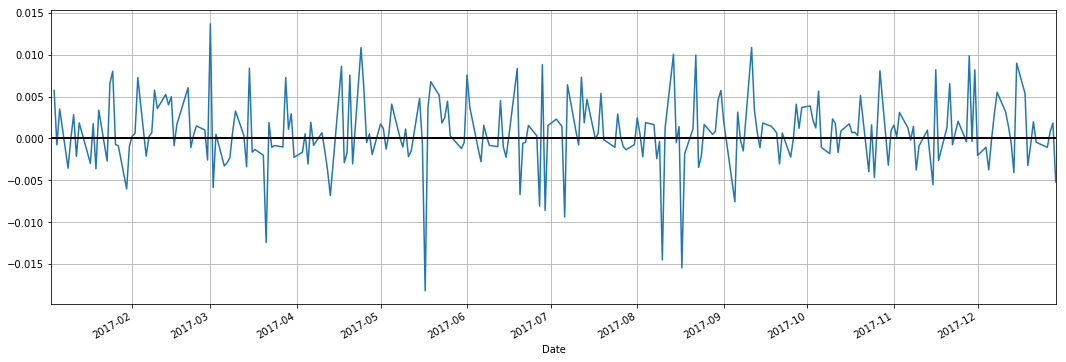

In [8]:
# calculate daily stock returns for S&P
benchmark_returns = benchmark.pct_change()
benchmark_returns.plot(figsize=(18,6), grid=True).axhline(y = 0, color = "black", lw = 2)
benchmark_returns.describe()

,BAC,C,HSBC,JPM
count,250.000000,250.000000,250.000000,250.000000
mean,0.000550,0.000255,0.000517,0.000273
std,0.011447,0.009229,0.008498,0.008358
min,-0.045693,-0.032607,-0.059111,-0.033365
25%,-0.006322,-0.005055,-0.003947,-0.004789
50%,-0.000225,-0.000722,-0.000070,-0.000141
75%,0.007016,0.005579,0.004339,0.004673
max,0.035216,0.036216,0.050705,0.025177


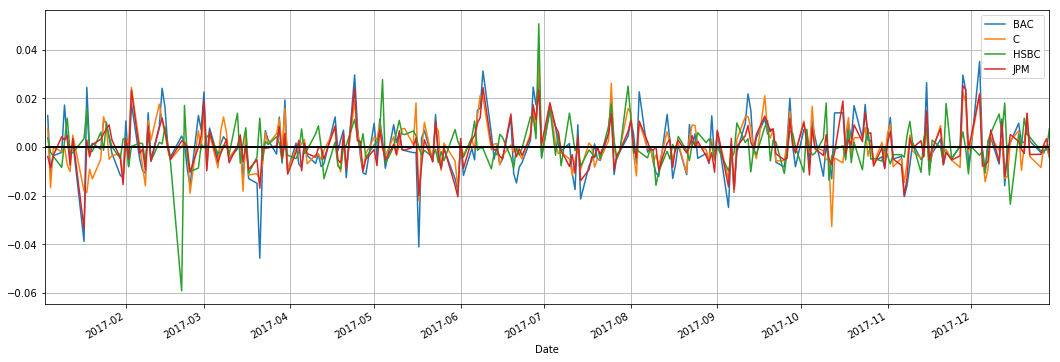

In [9]:
# calculate the difference in daily returns for stocks vs s&P
excess_returns = stock_returns.sub(benchmark_returns, axis=0)
excess_returns.plot(figsize=(18,6), grid=True).axhline(y = 0, color = "black", lw = 2)
excess_returns.describe()

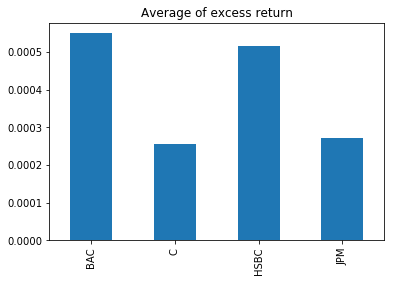

In [10]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='Average of excess return')

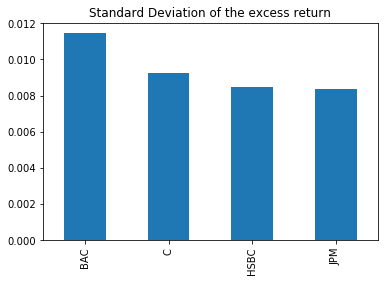

In [11]:
# calculate the standard deviation for daily excess return
std_excess_return = excess_returns.std()
std_excess_return.plot.bar(title='Standard Deviation of the excess return')

In [12]:
len(benchmark)

251

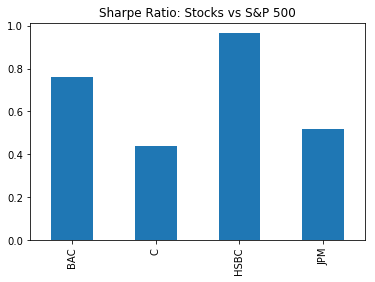

In [13]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(std_excess_return)
# annualize the sharpe ratio
ann = np.sqrt(len(benchmark))
annual_sharpe_ratio = daily_sharpe_ratio.mul(ann)
annual_sharpe_ratio.plot.bar(title='Sharpe Ratio: Stocks vs S&P 500')

We can see that for 2017 HSBC has the maximum Sharpe ratio and almost twice of JPM. So in terms of risk-adjustment, an investment in HSBC sounds more attractive than JPM. This difference in Sharpe ratio of JPM vs HSBC is mostly driven by differences in return rather than risk between them (see the two plots above). The risk of investing in JPM over HSBC (as measured by the standard deviation) is quite similar but the higher Sharpe ratio for HSBC ends up higher mainly due to the higher average daily returns for it. 

Also notice that BAC has higher returns than HSBC, but BAC has higher risk associated with it in terms of standard deviation, so BAC ends up having low Sharpe ratio as compared to HSBC.

In conclusion, this Sharpe ratio helps an investor to make decisions on investment opportunities by adjusting the returns by the differences in risk.